# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Anime Ratings Analysis</p>

<p style="text-align:center; ">
<img src="https://cdn.domestika.org/c_fill,dpr_auto,f_auto,h_630,q_auto,w_1200/v1644566275/blog-post-open-graph-covers/000/006/034/6034-original.jpg?1644566275" style='width: 600px; height: 300px;'>
</p>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

This dataset contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this dataset is a compilation of those ratings.

**anime.csv**

* **anime_id :** myanimelist.net's unique id identifying an anime.
* **name :** full name of anime.
* **genre :** comma separated list of genres for this anime.
* **type :** movie, TV, OVA, etc.
* **episodes :** how many episodes in this show. (1 if movie).
* **rating :** average rating out of 10 for this anime.
* **members :** number of community members that are in this anime's
"group".

**rating.csv**

* **user_id :** non identifiable randomly generated user id.
* **anime_id :** the anime that this user has rated.
* **rating :** rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).

In [28]:
anime = pd.read_csv("../input/anime-recommendations-database/anime.csv")
rating = pd.read_csv("../input/anime-recommendations-database/rating.csv")

In [29]:
print(f"Shape of the Anime Dataset : {anime.shape}")
print("/n Glimpse of the Dataset :")
anime.head().style.set_properties(**{"background-color": "#222831","color":"#eeeeee","border": "1.5px  solid white"})

Shape of the Anime Dataset : (12294, 7)
/n Glimpse of the Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Military, Shounen",TV,64,9.260000,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.250000,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.170000,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,51,9.160000,151266


In [30]:
print(f"Informations About Anime Dataset :\n")
print(anime.info())

Informations About Anime Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [31]:
print(f"Shape of The Rating Dataset : {rating.shape}")
print("\nGlimpse of The Dataset :")
rating.head().style.set_properties(**{"background-color": "#222831","color":"#eeeeee","border": "1.5px  solid white"})


Shape of The Rating Dataset : (7813737, 3)

Glimpse of The Dataset :


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [32]:
print(f"Informations About Rating Dataset :\n")
print(rating.info())

Informations About Rating Dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


<a id="4"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>


In [33]:
print(f"Summary of The Anime Dataset :")
anime.describe().T.style.set_properties(**{"background-color": "#222831","color":"#eeeeee","border": "1.5px  solid white"})


Summary of The Anime Dataset :


,count,mean,std,min,25%,50%,75%,max
anime_id,12294.000000,14058.221653,11455.294701,1.000000,3484.250000,10260.500000,24794.500000,34527.000000
rating,12064.000000,6.473902,1.026746,1.670000,5.880000,6.570000,7.180000,10.000000
members,12294.000000,18071.338864,54820.676925,5.000000,225.000000,1550.000000,9437.000000,1013917.000000


In [34]:
anime.describe(include=object).T.style.set_properties(**{"background-color": "#222831","color":"#eeeeee","border": "1.5px  solid white"})


,count,unique,top,freq
name,12294,12292,Shi Wan Ge Leng Xiaohua,2
genre,12232,3264,Hentai,823
type,12269,6,TV,3787
episodes,12294,187,1,5677


In [35]:
print("Null Values of Anime Dataset :")
anime.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#222831","color":"#eeeeee","border": "1.5px  solid white"})


Null Values of Anime Dataset :


,anime_id,name,genre,type,episodes,rating,members
0,0,0,62,25,0,230,0


In [36]:
anime.dropna(axis=0,inplace=True) #drop rows that contain null values
anime.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#222831","color":"#eeeeee","border": "1.5px  solid white"})

,anime_id,name,genre,type,episodes,rating,members
0,0,0,0,0,0,0,0


In [37]:
anime_dup = anime[anime.duplicated()].shape[0]
print(f"There are {anime_dup} duplicate entries among {anime.shape[0]} entries in anime dataset ")

There are 0 duplicate entries among 12017 entries in anime dataset 


In [38]:
print("Summary of the Rating Dataset:")
rating.describe().T.style.set_properties(**{"background-color": "#222831","color":"#eeeeee","border": "1.5px  solid white"})

Summary of the Rating Dataset:


,count,mean,std,min,25%,50%,75%,max
user_id,7813737.000000,36727.956745,20997.946119,1.000000,18974.000000,36791.000000,54757.000000,73516.000000
anime_id,7813737.000000,8909.072104,8883.949636,1.000000,1240.000000,6213.000000,14093.000000,34519.000000
rating,7813737.000000,6.144030,3.727800,-1.000000,6.000000,7.000000,9.000000,10.000000


In [39]:
print("Null Values of Rating Dataset :")
rating.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#222831","color":"#eeeeee","border": "1.5px  solid white"})

Null Values of Rating Dataset :


,user_id,anime_id,rating
0,0,0,0


In [40]:
dup_rating = rating[rating.duplicated()].shape[0]
print(f"There are {dup_rating} duplicate entries among {rating.shape[0]} entries in rating dataset.")

rating.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {rating.shape[0]} entries in this dataset.")

There are 1 duplicate entries among 7813737 entries in rating dataset.

After removing duplicate entries there are 7813736 entries in this dataset.


<a id="4"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Merging the Anime Datasets</p>


In [41]:
fulldata = pd.merge(anime,rating,on="anime_id",suffixes= [None, "_user"]) #merging columns using anime_id as a common factor
fulldata = fulldata.rename(columns={"rating_user": "user_rating"})


In [42]:
print(f"Shape of The Merged Dataset : {fulldata.shape}")
print(f"\nGlimpse of The Merged Dataset :")

fulldata.head().style.set_properties(**{"background-color": "#222831","color":"#eeeeee","border": "1.5px  solid white"})

Shape of The Merged Dataset : (7813610, 9)

Glimpse of The Merged Dataset :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.370000,200630,278,-1


<a id="4"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Color Pallete for Visualization</p>


In [43]:
sns.set_style("white")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]


<a id="4"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Top Anime Watched based on members</p>


In [44]:
top_anime = fulldata.copy()
top_anime.drop_duplicates(subset ="name", keep = "first", inplace = True)
top_anime_temp1 = top_anime.sort_values(["members"],ascending=False)

In [45]:
top_anime.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
26773,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,39,-1
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9
47442,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9


In [46]:
top_anime_temp1.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
344257,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,3,10
568937,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229,1,-1
3160071,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,1,10
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
1007976,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796,1,-1


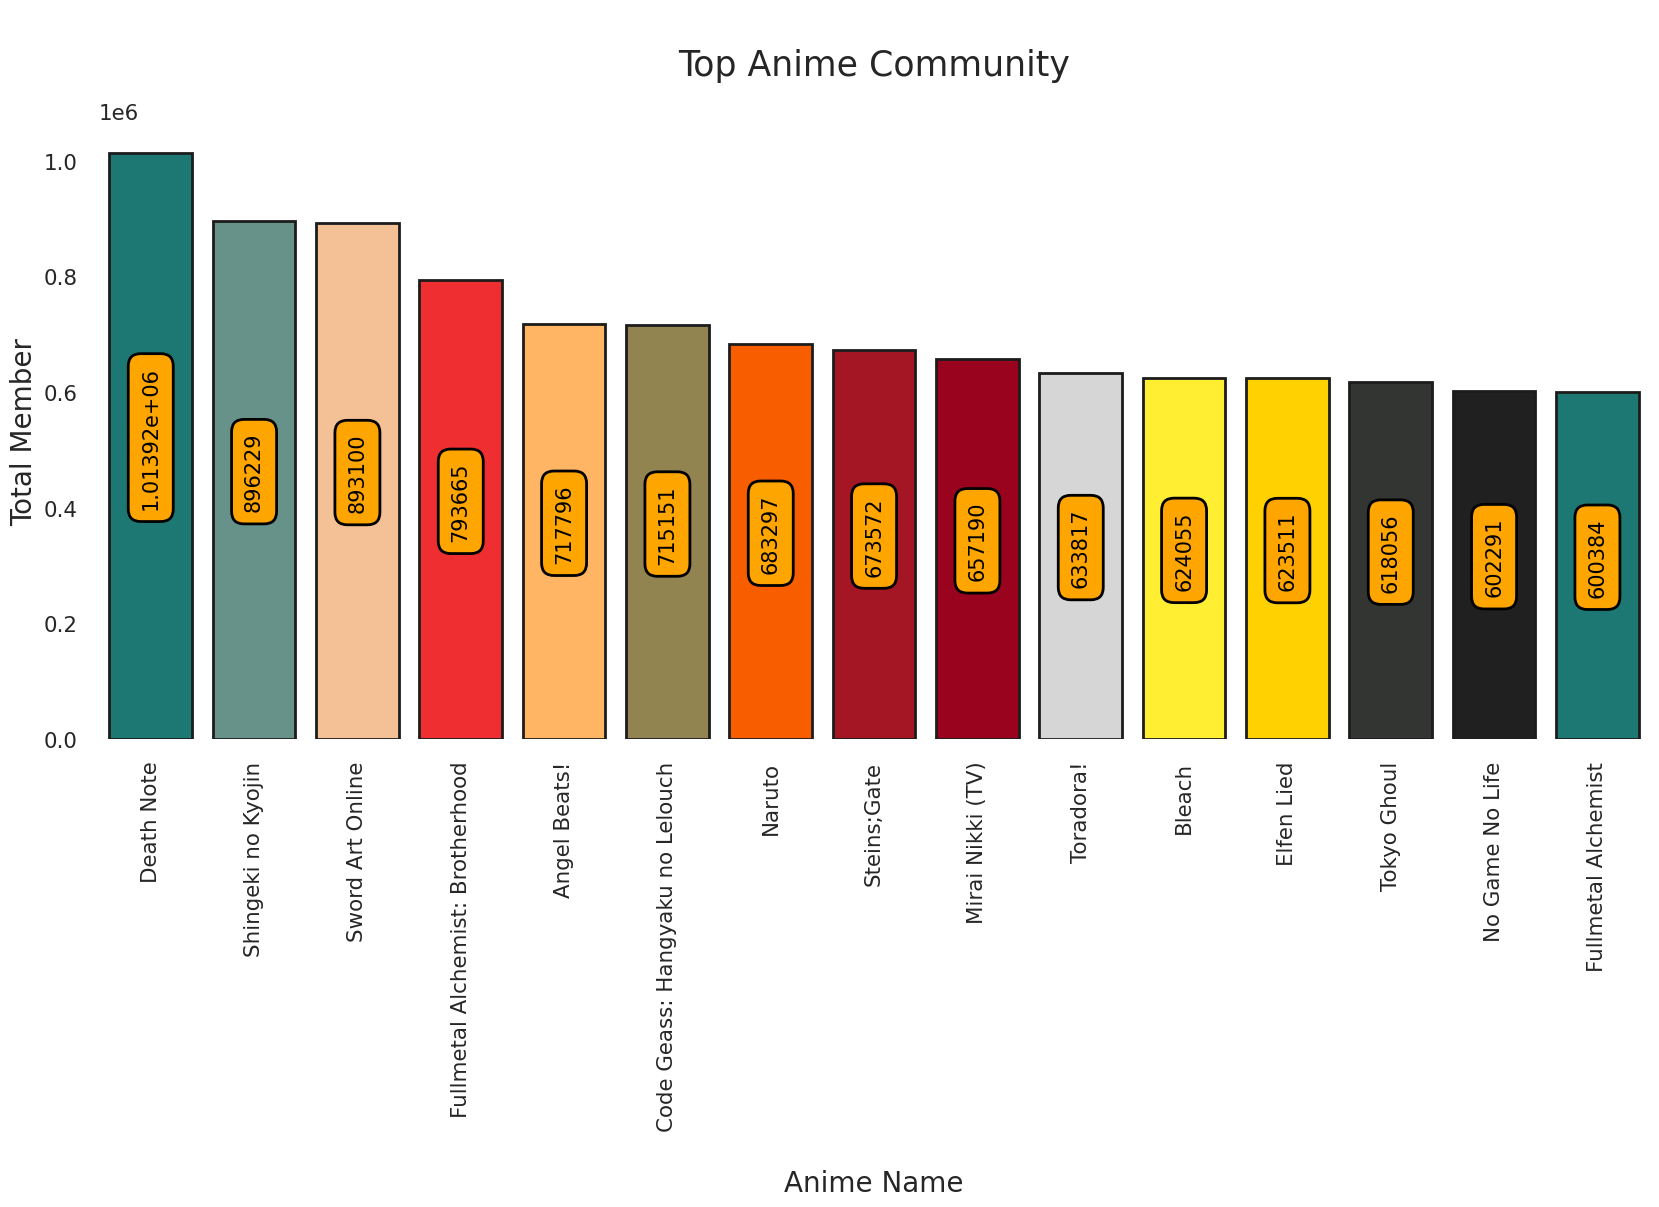

In [47]:
plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_anime_temp1["name"][:15],y=top_anime_temp1["members"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop Anime Community\n", fontsize=25)
plt.ylabel("Total Member" , fontsize = 20)
plt.xlabel("\nAnime Name" , fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* **Death Note** wears the crown for highest community members followed by **Shingeki no Kyojin** and **Sword Art Online** 

***One piece should be at the top but the dataset is 6 years old so it is what it is***

<a id="4"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Top Anime Category</p>


In [48]:
print("Anime Categories :")
top_anime_temp1["type"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#222831","color":"#eeeeee","border": "1.5px  solid white"})

Anime Categories :


,TV,OVA,Movie,Special,ONA,Music
type,3402,3090,2111,1581,526,451


Text(0.5, 1.0, '\nAnime Categories Distribution')

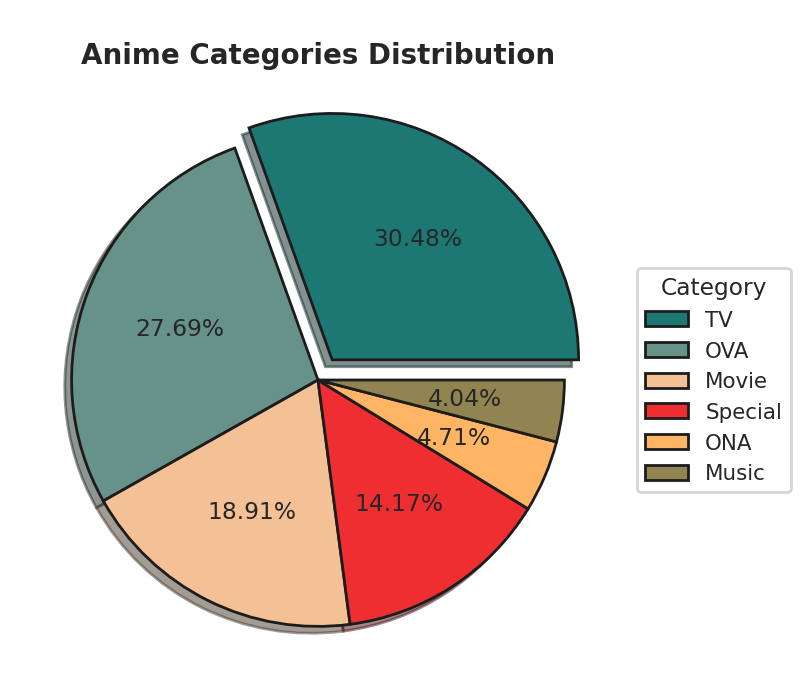

In [49]:
value_counts = top_anime_temp1["type"].value_counts()
plt.subplots(figsize=(12, 8))
labels = "TV","OVA","Movie","Special","ONA","Music"
# Plotting a pie chart
plt.pie(value_counts, autopct='%1.2f%%',colors=palette,explode = (0.1,0,0,0,0,0),shadow=True,
        wedgeprops={'edgecolor': '#1c1c1c','linewidth':2})
plt.legend(labels, title="Category",loc="center left",bbox_to_anchor=(1, 0.5))
plt.title("\nAnime Categories Distribution",fontsize=20,fontweight="bold")
#plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

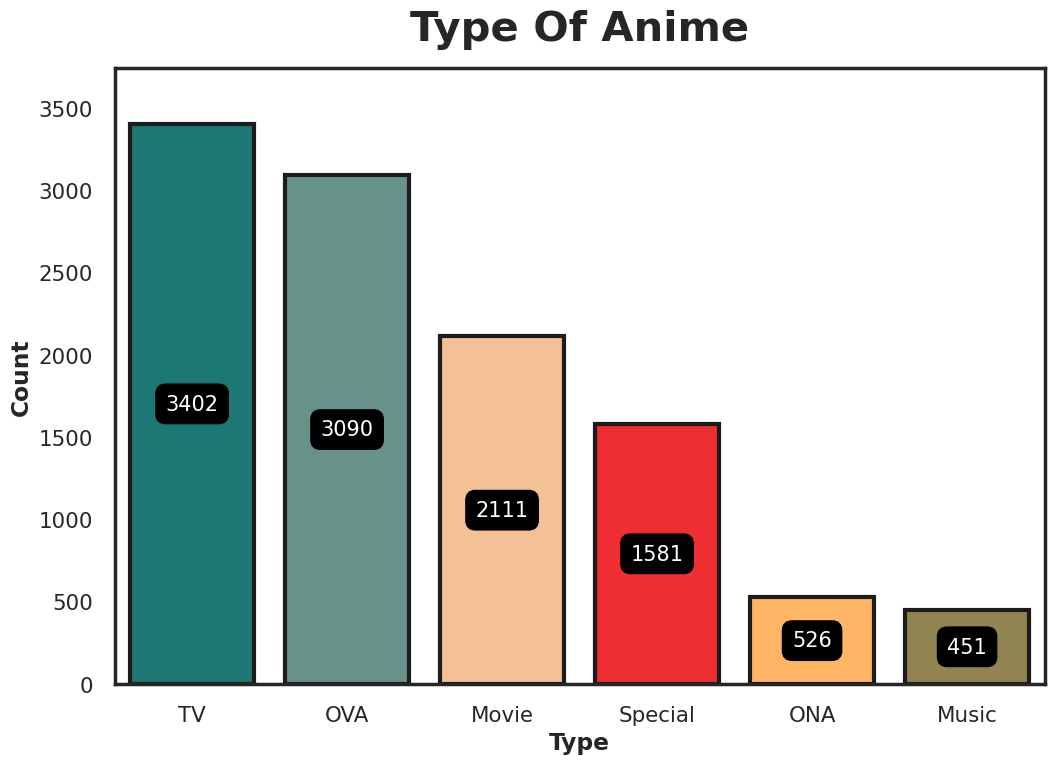

In [50]:
import seaborn as sns

# Value counts of "type" column
value_counts = top_anime_temp1["type"].value_counts()
plt.subplots(figsize = (12,8))

# Plotting a bar plot
p=sns.barplot(x=value_counts.index, y=value_counts, palette=palette,saturation=1,edgecolor = "#1c1c1c",linewidth=3)
plt.title("Type Of Anime",fontweight="bold",fontsize=30,pad=20)
plt.xlabel("Type",fontweight="bold")
plt.ylabel("Count",fontweight="bold")

for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 0,size = 15,color = "white",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "black", "edgecolor": "black", "linewidth" : 3, "alpha": 1})


# Set the y-axis limits
plt.ylim(bottom=0, top=value_counts.max()*1.1)

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation='horizontal')

# Display the bar plot
plt.show()

**Insights:**

* 3402 animes are aired on TV which is 30.48% of total animes
* 2111 animes are streamed as Movie which is 18.91% of total animes
* 3090 animes are streamed as OVA which is 27.69% of total animes also greater than ONA which includes 526 animes that is 4.71% of total animes.

<a id="4"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Overall Anime Ratings</p>


In [51]:
top_anime_ratings = top_anime.sort_values(["rating"],ascending=False)
top_anime_ratings.head()


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
7688010,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62,48766,-1
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
7689569,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53,48766,-1
26773,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,39,-1


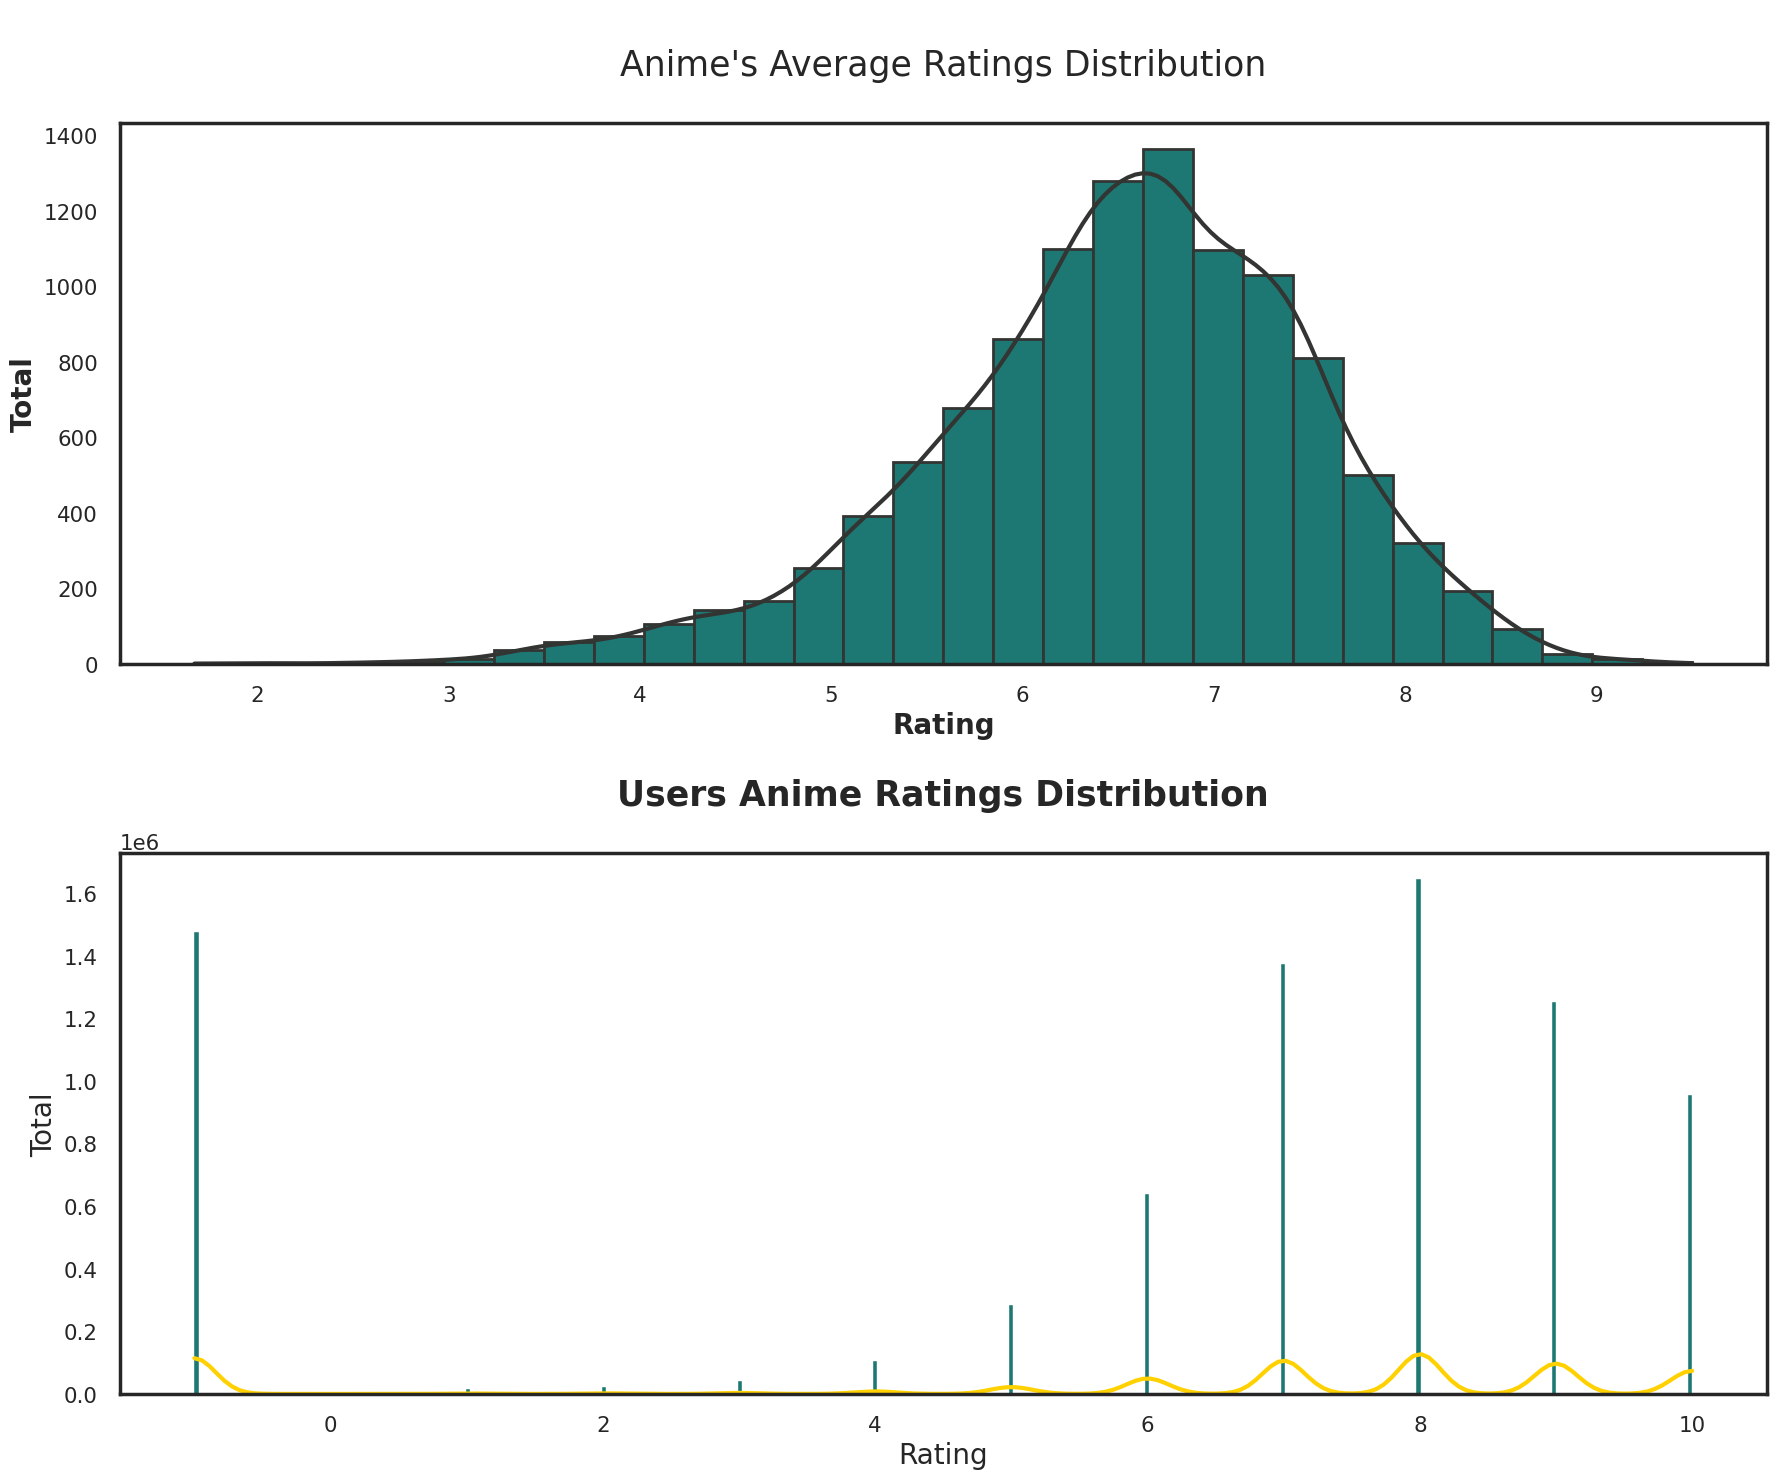

In [57]:
_, axs = plt.subplots(2,1,figsize=(20,16),sharex=False,sharey=False)
plt.tight_layout(pad=6.0)

sns.histplot(top_anime_ratings["rating"],color=palette[0],kde=True,ax=axs[0],bins=30,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nAnime's Average Ratings Distribution\n",fontsize = 25)
axs[0].set_xlabel("Rating\n", fontsize = 20, fontweight="bold")
axs[0].set_ylabel("Total", fontsize = 20,fontweight="bold")

sns.histplot(fulldata["user_rating"],color=palette[0],kde=True,ax=axs[1],bins='auto',alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\n\n\nUsers Anime Ratings Distribution\n",fontsize = 25,fontweight="bold")
axs[1].set_xlabel("Rating", fontsize = 20)
axs[1].set_ylabel("Total", fontsize = 20)

#sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the Anime ratings are spread between 5 - 8
* Most of the users ratings are spread between 6.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 8.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

<a id="4"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Top Anime Based on Ratings</p>


In [58]:
top_anime_ratings.head()

,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
7688010,23005,Mogura no Motoro,Slice of Life,Movie,1,9.50,62,48766,-1
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
7689569,26313,Yakusoku: Africa Mizu to Midori,"Drama, Kids",OVA,1,9.25,53,48766,-1
26773,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,39,-1


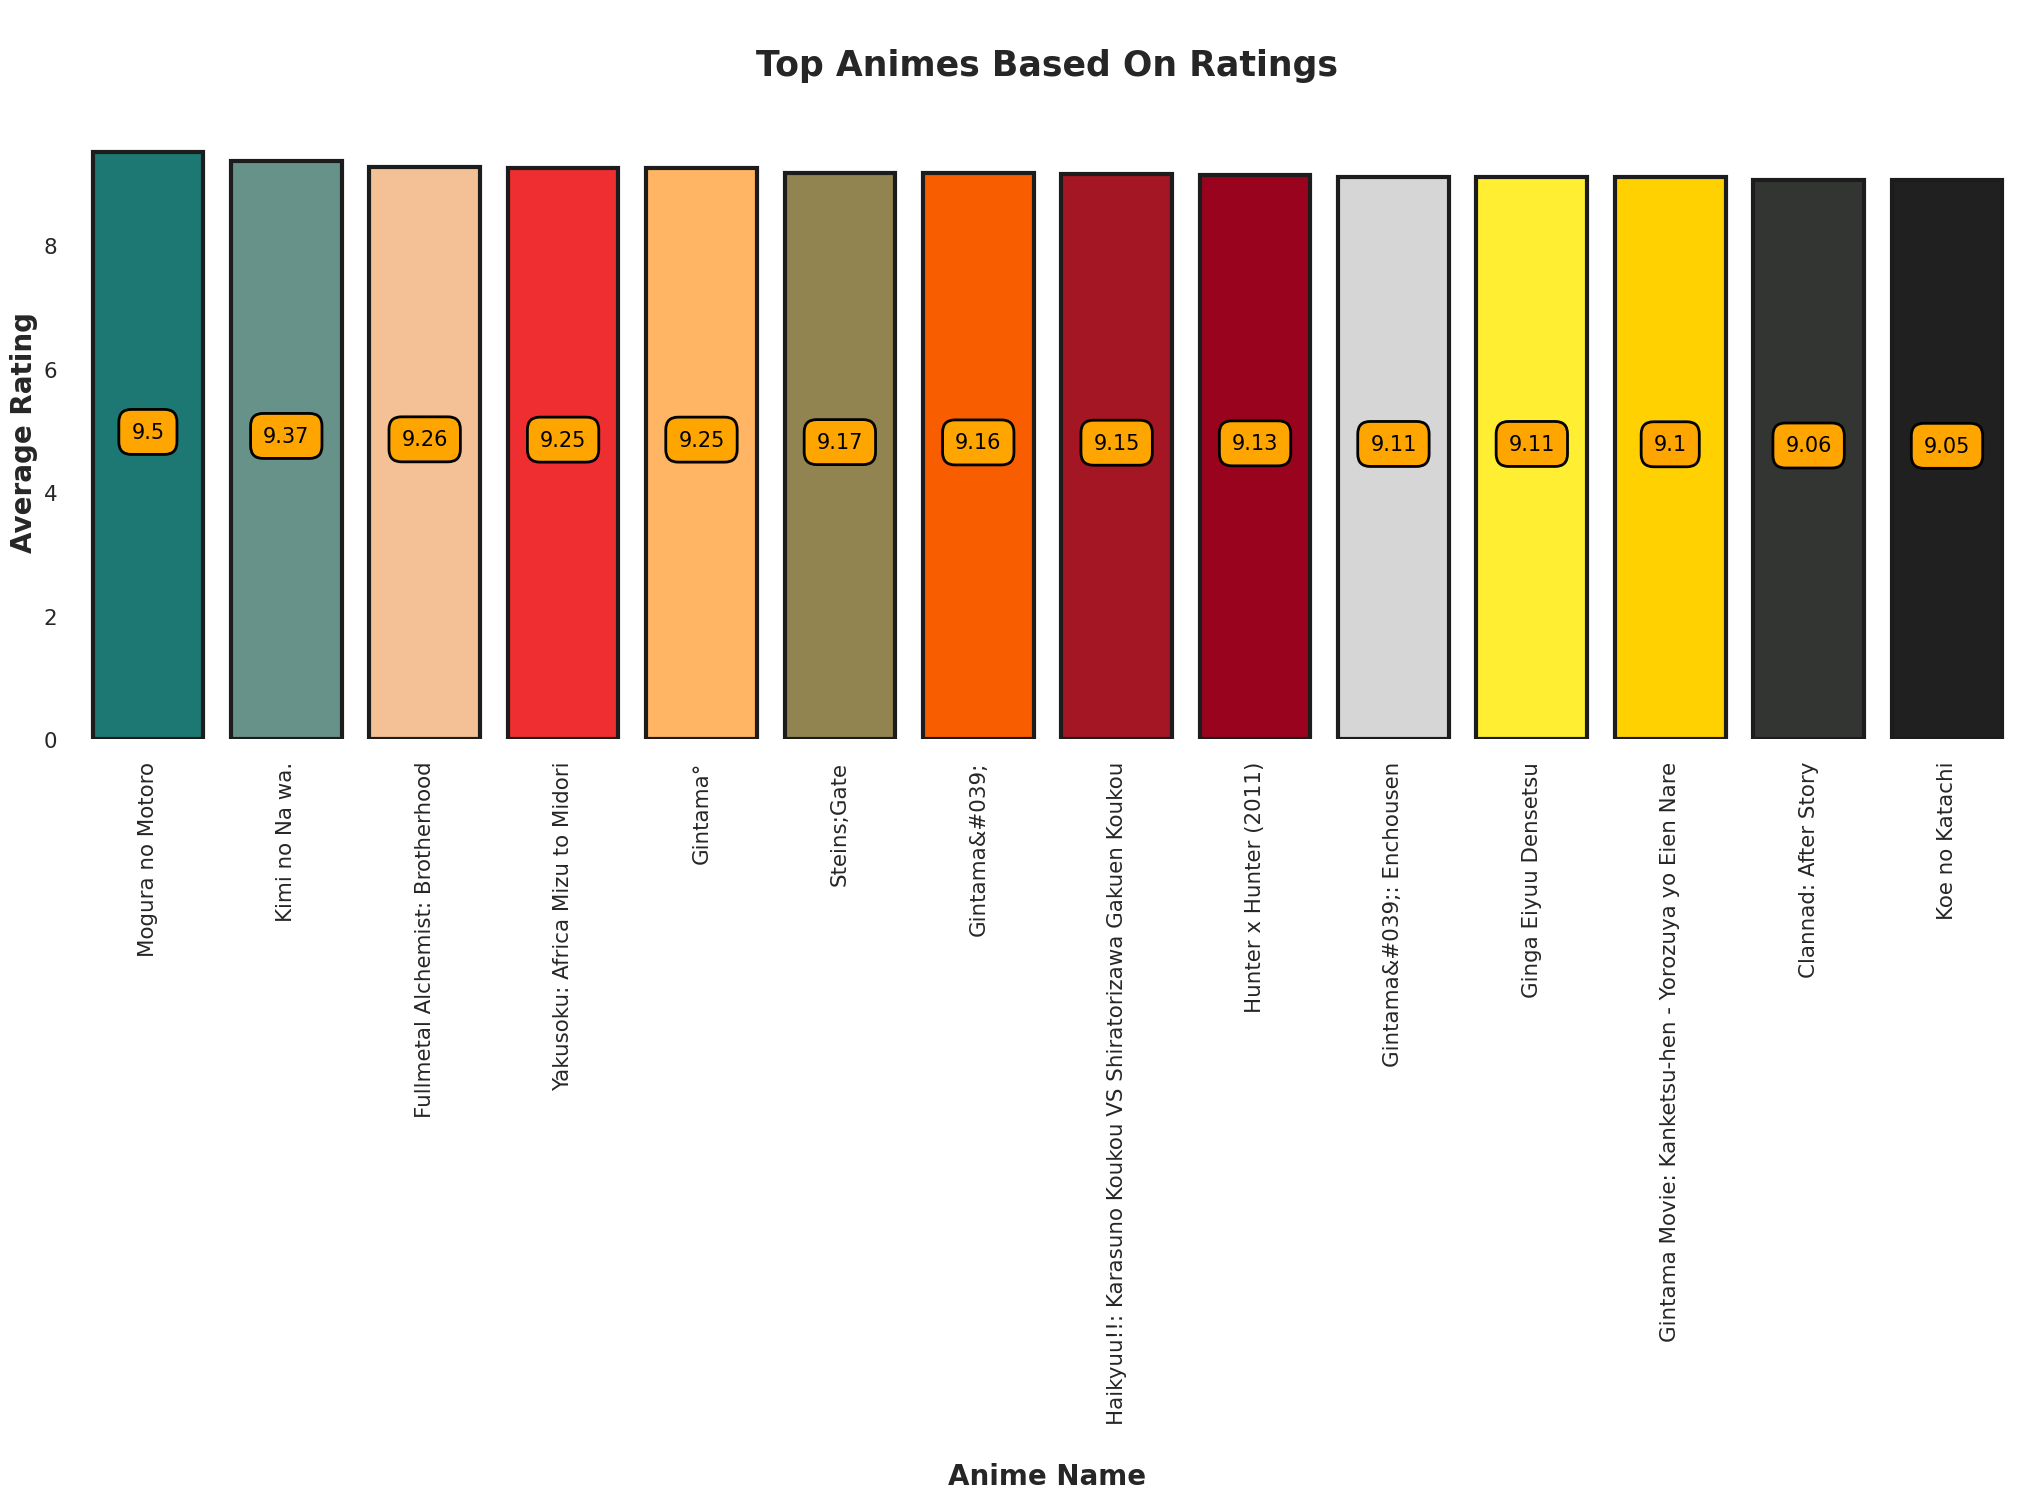

In [69]:
plt.subplots(figsize = (25,8))
p=sns.barplot(x=top_anime_ratings['name'][:14], y=top_anime_ratings['rating'], palette=palette,saturation=1,edgecolor = "#1c1c1c",linewidth=3)
p.axes.set_title("\nTop Animes Based On Ratings\n",fontsize = 25,fontweight="bold")
plt.ylabel("Average Rating",fontsize = 20,fontweight="bold")
plt.xlabel("\nAnime Name",fontsize = 20,fontweight="bold")
plt.xticks(rotation='vertical')
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 10,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})
sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* **Mogura no Motoro** wears the crown for highest rating followed by **Kimi no Na wa.** and **Fullmetal Alchemist: Brotherhood**

<a id="4"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Category-wise Anime Ratings Distribution</p>


Let's explore the ratings distribution of TV category :



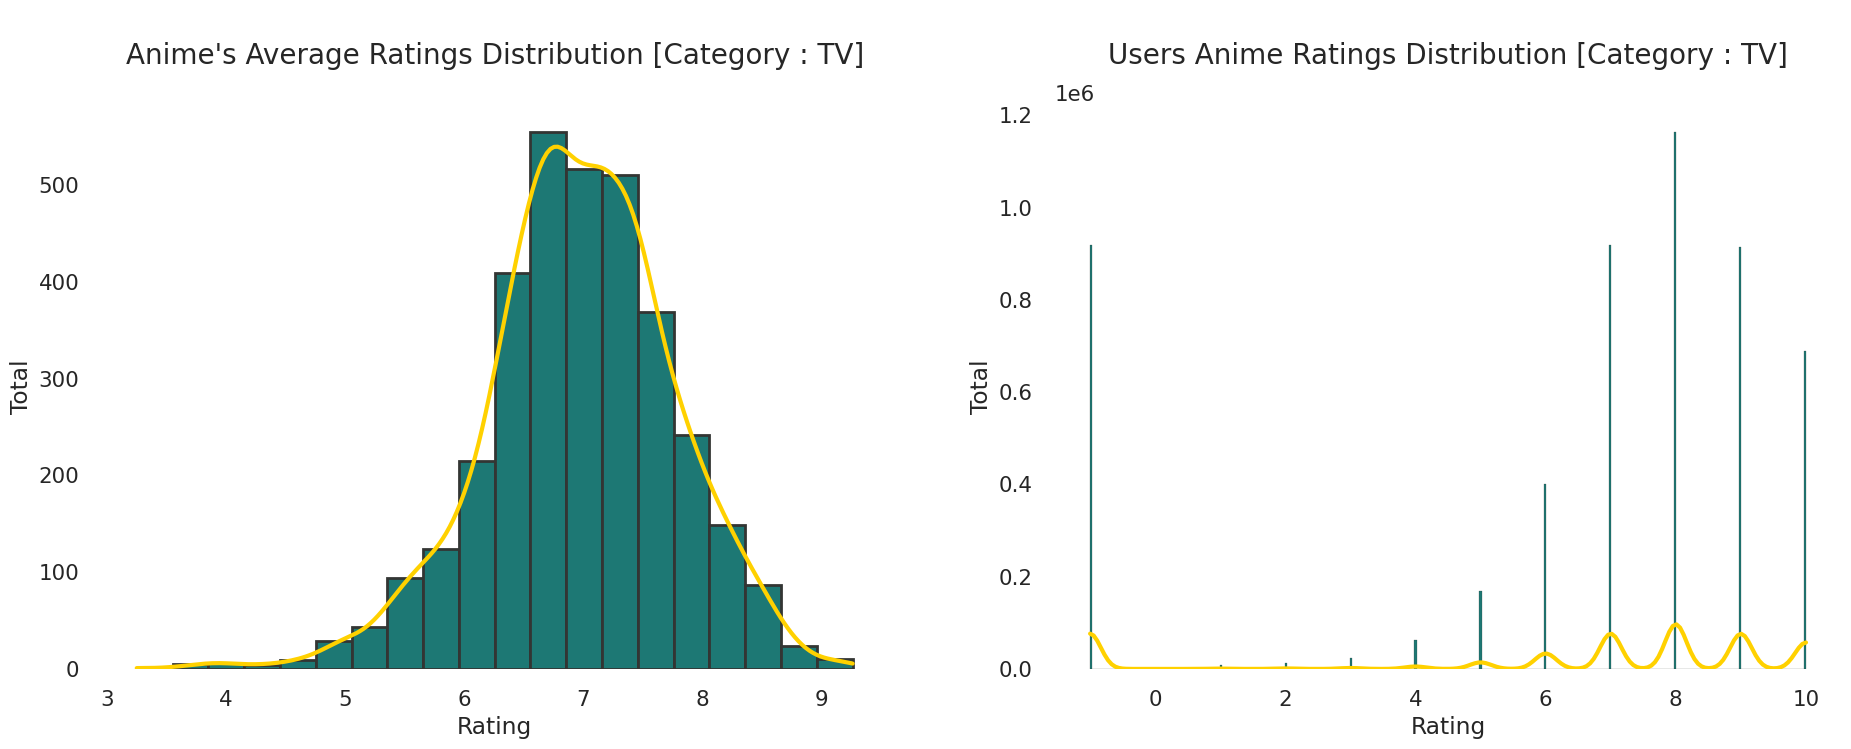

In [75]:
print("Let's explore the ratings distribution of TV category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_ratings[top_anime_ratings["type"]=="TV"]["rating"],color=palette[0],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : TV]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="TV"]["user_rating"],color=palette[0],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : TV]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the Anime ratings are spread between 6.0 - 8.0
* Most of the users ratings are spread between 6.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 9.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

Let's explore the ratings distribution of OVA category :



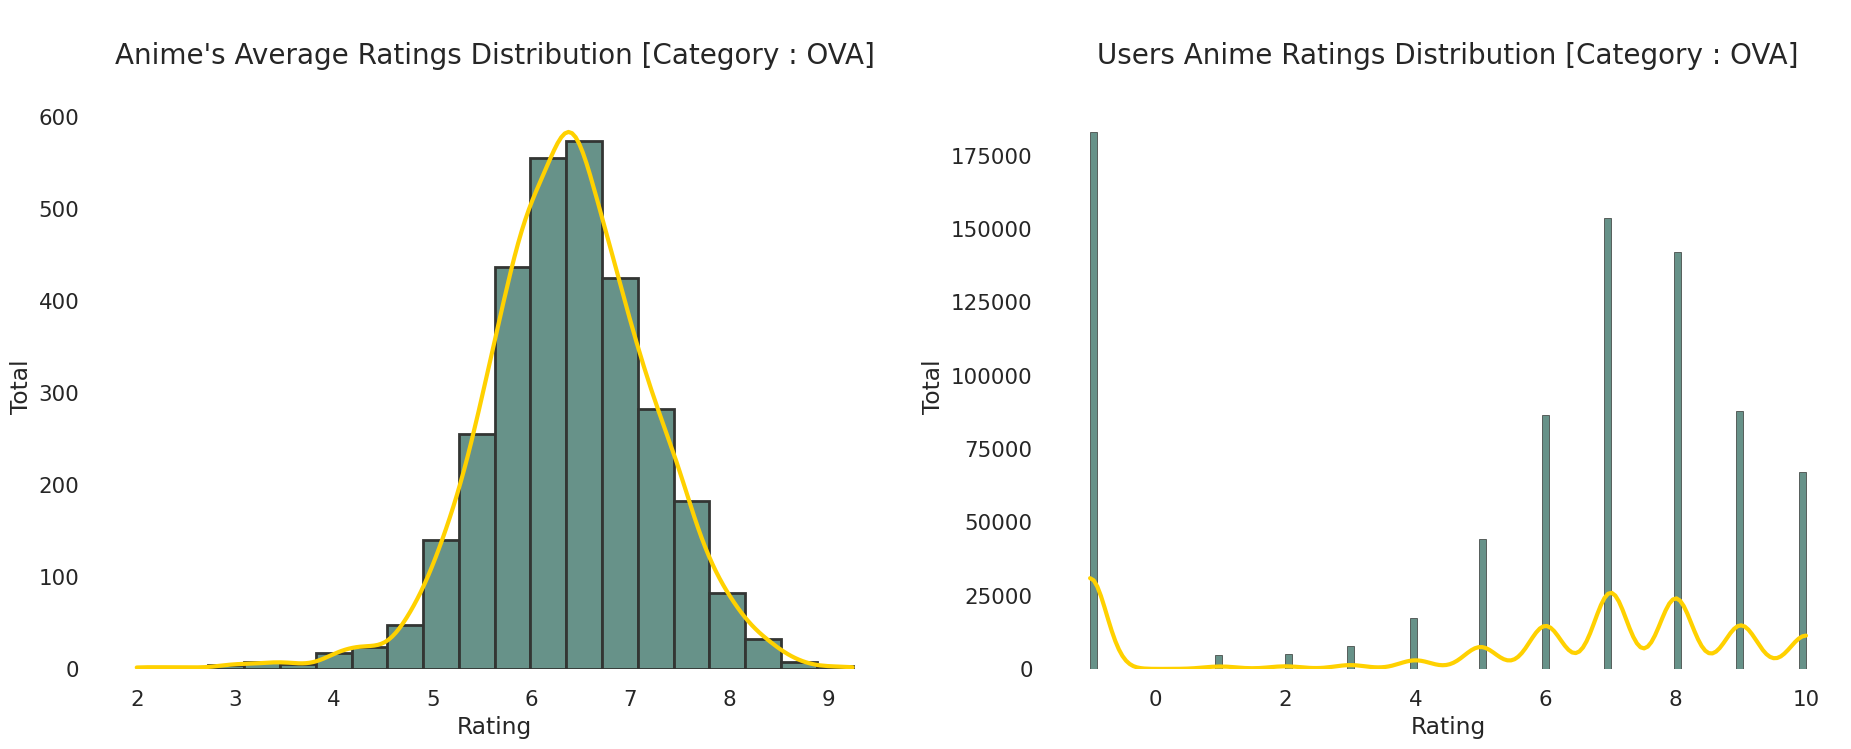

In [76]:
print("Let's explore the ratings distribution of OVA category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_ratings[top_anime_ratings["type"]=="OVA"]["rating"],color=palette[1],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="OVA"]["user_rating"],color=palette[1],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : OVA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the Anime ratings are spread between 5.5 - 7.5
* Most of the users ratings are spread between 5.5 - 10.0
* The mode of the users ratings distribution is around 7.0 - 8.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

Let's explore the ratings distribution of MOVIE category :



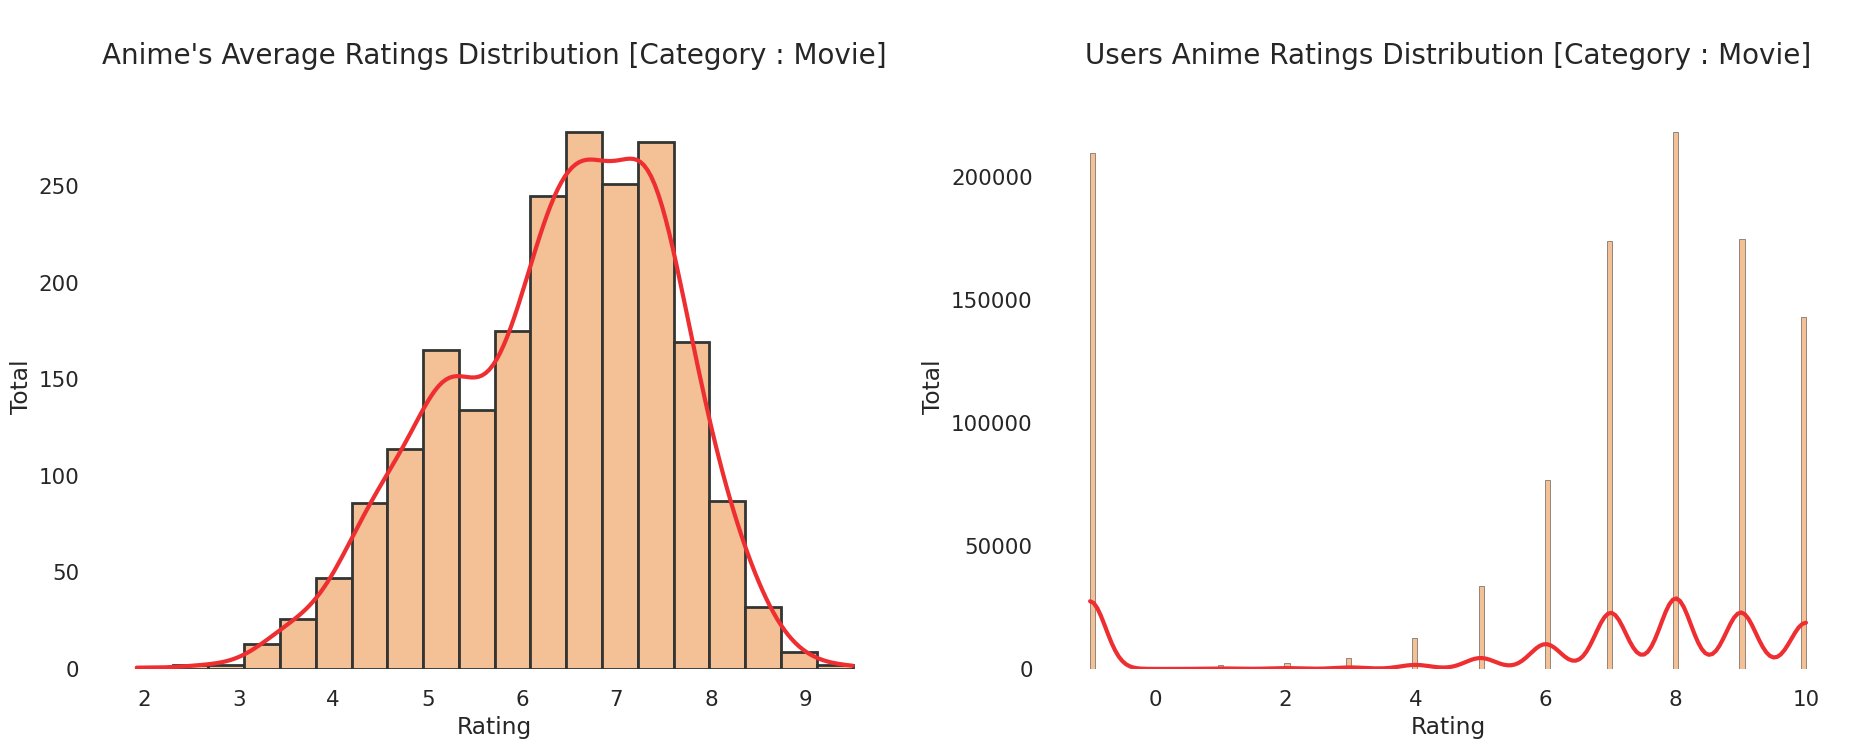

In [78]:
print("Let's explore the ratings distribution of MOVIE category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_ratings[top_anime_ratings["type"]=="Movie"]["rating"],color=palette[2],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[3])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Movie"]["user_rating"],color=palette[2],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[3])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Movie]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the Anime ratings are spread between 4.5 - 8.5
* Most of the users ratings are spread between 5.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 9.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

Let's explore the ratings distribution of SPECIAL category :



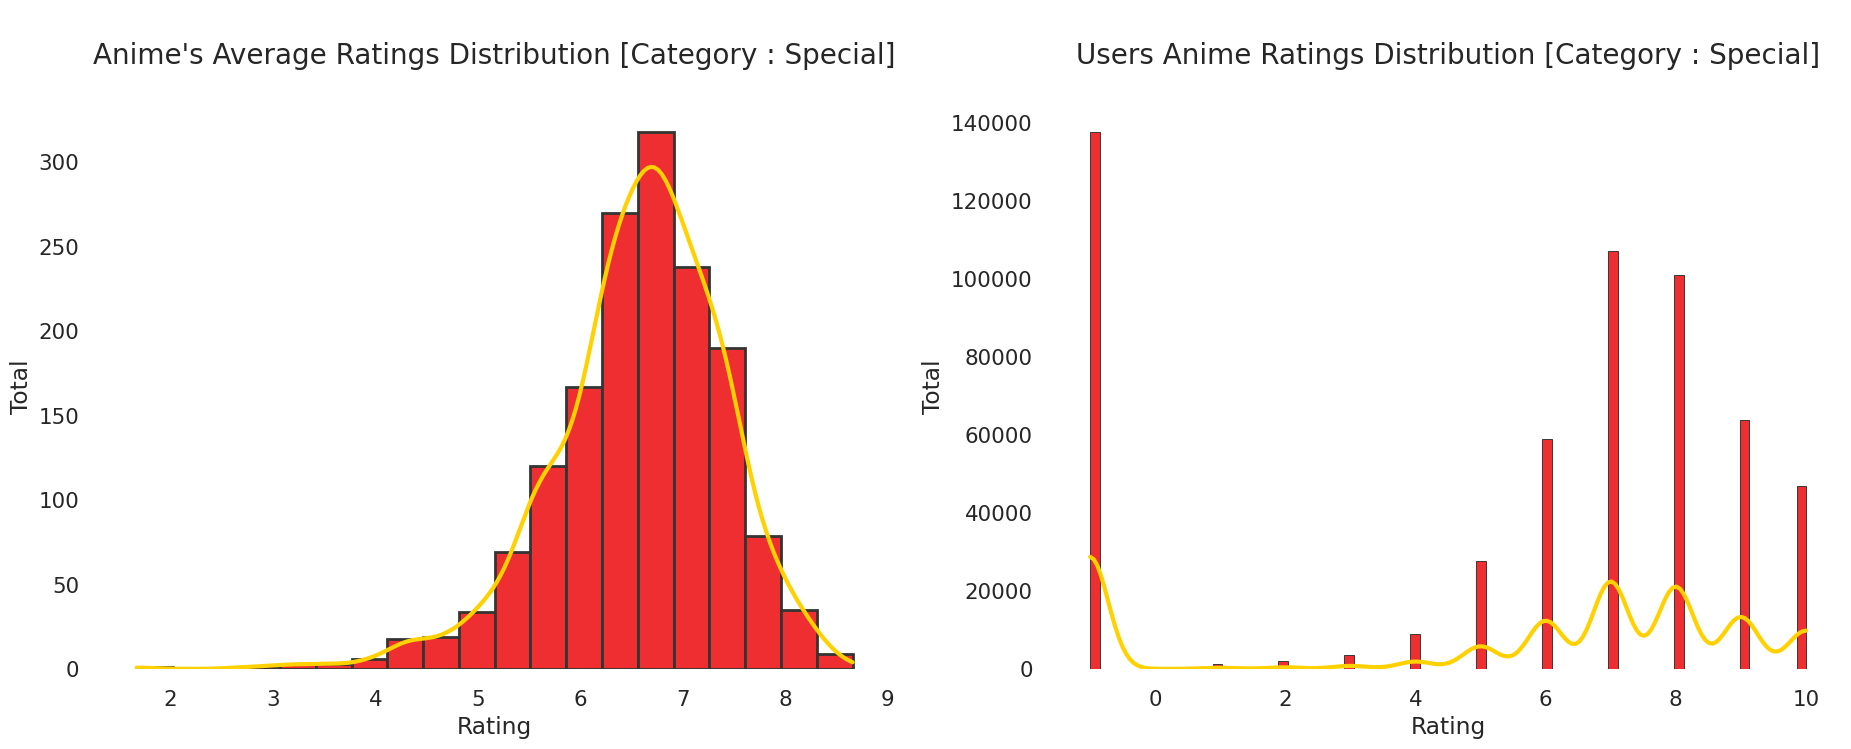

In [80]:
print("Let's explore the ratings distribution of SPECIAL category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_ratings[top_anime_ratings["type"]=="Special"]["rating"],color=palette[3],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Special]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Special"]["user_rating"],color=palette[3],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Special]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the Anime ratings are spread between 5.5 - 8.0
* Most of the users ratings are spread between 5.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 8.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

Let's explore the ratings distribution of ONA category :



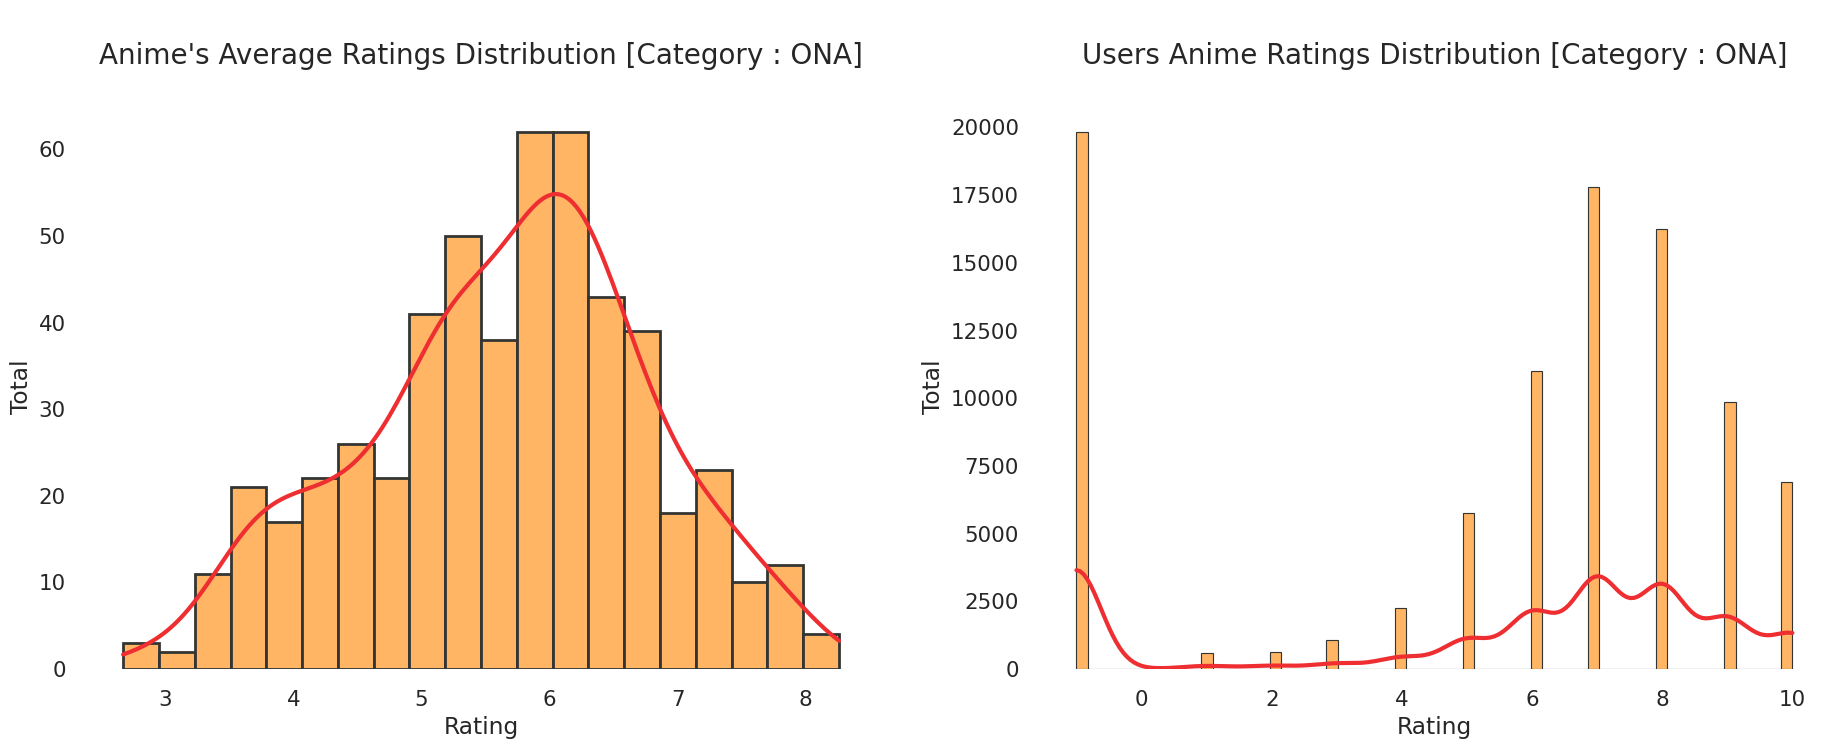

In [81]:
print("Let's explore the ratings distribution of ONA category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_ratings[top_anime_ratings["type"]=="ONA"]["rating"],color=palette[4],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[3])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="ONA"]["user_rating"],color=palette[4],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[3])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : ONA]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the Anime ratings are spread between 4.0 - 7.0
* Most of the users ratings are spread between 5.0 - 10.0
* The mode of the users ratings distribution is around 7.0 - 8.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

Let's explore the ratings distribution of MUSIC category :



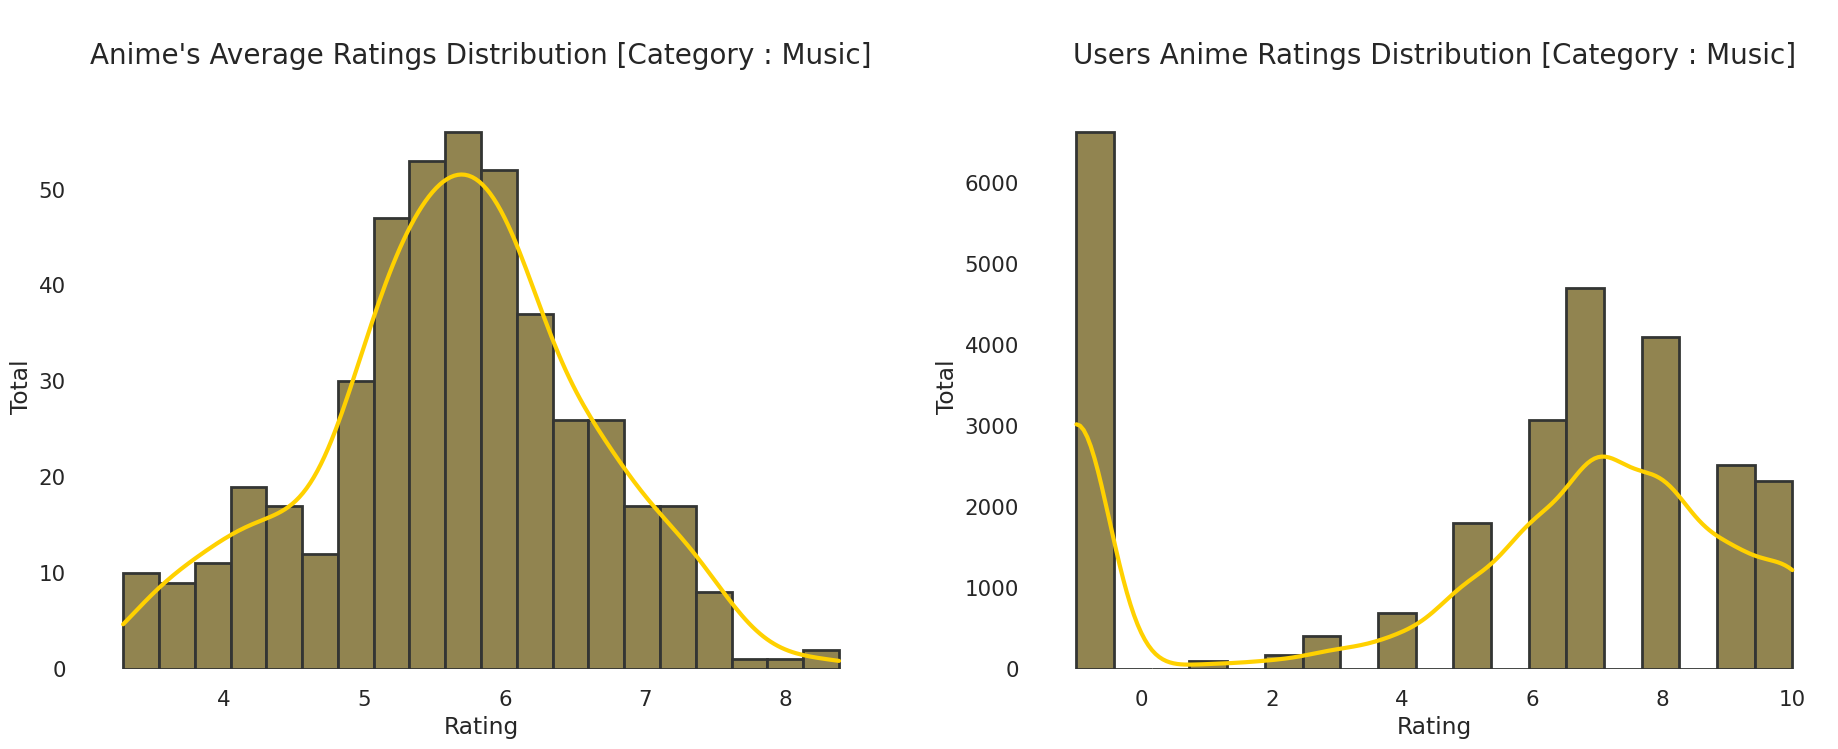

In [82]:
print("Let's explore the ratings distribution of MUSIC category :\n")

_, axs = plt.subplots(1,2,figsize=(20,8),sharex=False,sharey=False)
plt.tight_layout(pad=4.0)

sns.histplot(top_anime_ratings[top_anime_ratings["type"]=="Music"]["rating"],color=palette[5],kde=True,ax=axs[0],bins=20,alpha=1,fill=True,edgecolor=palette[12])
axs[0].lines[0].set_color(palette[11])
axs[0].set_title("\nAnime's Average Ratings Distribution [Category : Music]\n",fontsize=20)
axs[0].set_xlabel("Rating")
axs[0].set_ylabel("Total")

sns.histplot(fulldata[fulldata["type"]=="Music"]["user_rating"],color=palette[5],kde=True,ax=axs[1],bins="auto",alpha=1,fill=True,edgecolor=palette[12])
axs[1].lines[0].set_color(palette[11])
# axs[1].set_yscale("log")
axs[1].set_title("\nUsers Anime Ratings Distribution [Category : Music]\n",fontsize=20)
axs[1].set_xlabel("Rating")
axs[1].set_ylabel("Total")

sns.despine(left=True, bottom=True)
plt.show()

**Insights:**

* Most of the Anime ratings are spread between 4.0 - 7.5
* Most of the users ratings are spread between 5.0 - 10.0
* The mode of the users ratings distribution is around 6.5 - 8.0
* Both the distribution are left skewed
* Users rating(-1) is an outlier in ratings of users which can be discarded

<a id="4"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Anime Genres</p>


In [90]:
top_anime['genre'].head()

0                     Drama, Romance, School, Supernatural
2199     Action, Adventure, Drama, Fantasy, Magic, Mili...
26773    Action, Comedy, Historical, Parody, Samurai, S...
28159                                     Sci-Fi, Thriller
47442    Action, Comedy, Historical, Parody, Samurai, S...
Name: genre, dtype: object

In [107]:
top_anime_temp3 = top_anime["genre"].to_frame()

top_anime_temp3["genre"] = top_anime_temp3["genre"].str.split(", | , | ,")
top_anime_temp3 = top_anime_temp3.explode("genre")
top_anime_temp3["genre"] = top_anime_temp3["genre"].str.title()

print(f'Total unique genres are {len(top_anime_temp3["genre"].unique())}')
print(f'Occurances of unique genres :')
top_anime_temp3["genre"].value_counts().to_frame().T.style.set_properties(**{"background-color": "#222831","color":"#eeeeee","border": "1.5px  solid white"})

Total unique genres are 43
Occurances of unique genres :


,Comedy,Action,Adventure,Fantasy,Sci-Fi,Drama,Shounen,Romance,Kids,School,Slice Of Life,Hentai,Supernatural,Mecha,Music,Historical,Magic,Ecchi,Shoujo,Seinen,Sports,Mystery,Super Power,Military,Parody,Space,Horror,Harem,Demons,Martial Arts,Psychological,Dementia,Police,Game,Samurai,Vampire,Thriller,Cars,Shounen Ai,Shoujo Ai,Josei,Yuri,Yaoi
genre,4271,2686,2197,2107,1981,1857,1636,1420,1306,1135,1115,1095,964,910,763,719,712,619,576,513,508,472,433,410,379,362,348,306,279,246,221,200,183,161,142,97,84,65,61,54,52,41,37


let's explore how genre's wordcloud looks like



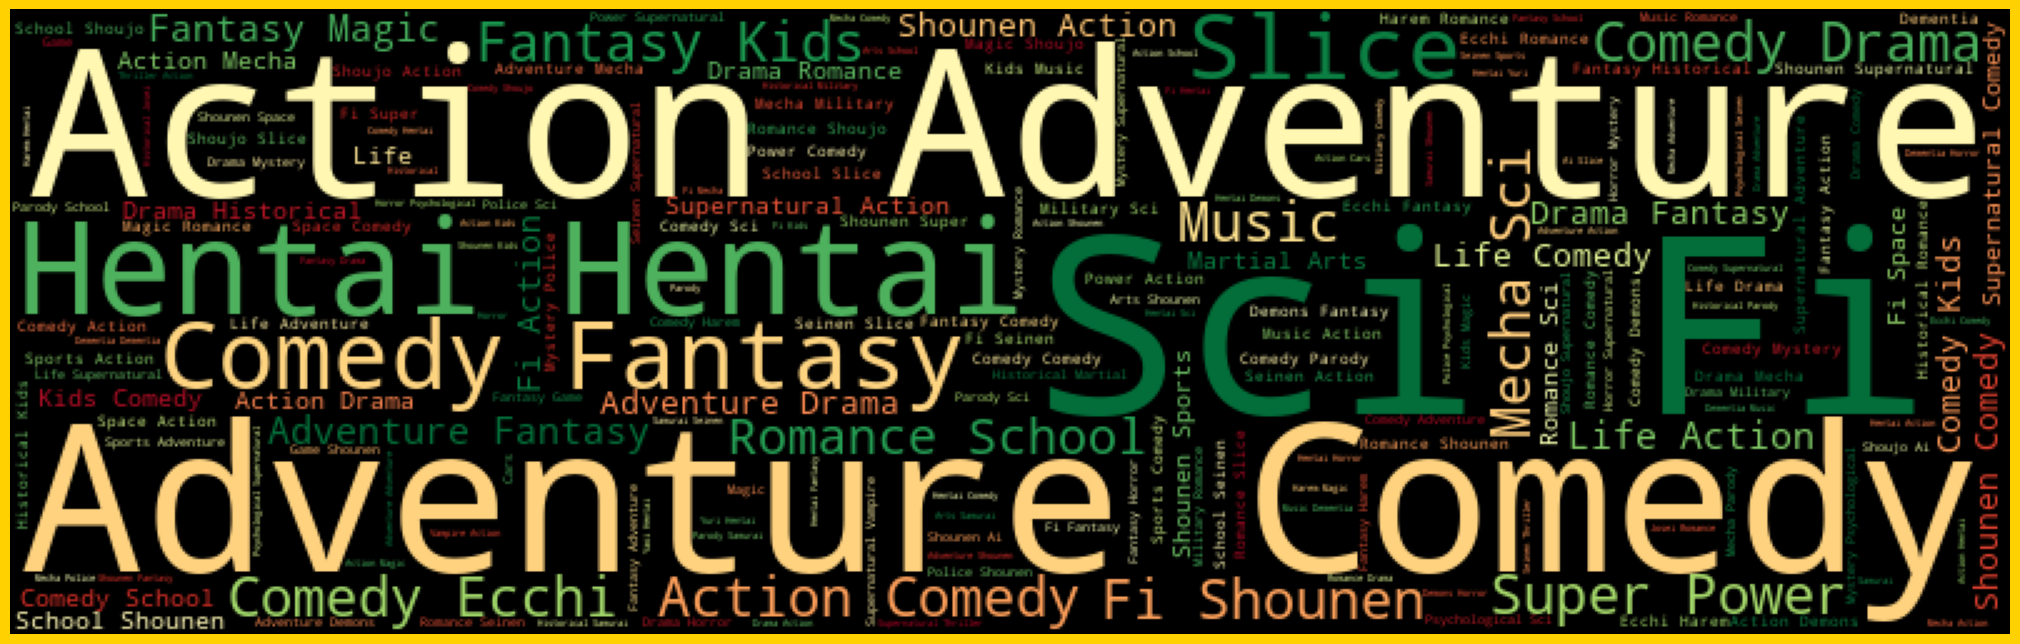

In [108]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 250, background_color ="black",colormap ="RdYlGn",
                      max_font_size=100, stopwords =None,repeat= True).generate(top_anime["genre"].str.cat(sep=", | , | ,"))

print("let's explore how genre's wordcloud looks like\n")
plt.figure(figsize = (20, 8),facecolor = "#ffd100") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.tight_layout(pad = 0) 
plt.show()

<a id="4"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Final Data Preprocessing</p>



In [110]:
data = fulldata.copy()
data["user_rating"].replace(to_replace = -1 , value = np.nan ,inplace=True)
data = data.dropna(axis = 0)
print("Null values after final pre-processing :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#222831","color":"#eeeeee","border": "1.5px  solid white"})

Null values after final pre-processing :


,anime_id,name,genre,type,episodes,rating,members,user_id,user_rating
0,0,0,0,0,0,0,0,0,0


There are a lot of users who have rated only once, even if they have rated 5 animes, it can't be considered as a valuable record for recommendation. So we will consider minimum 50 ratings by the user as a threshold value.

In [116]:
selected_users = data["user_id"].value_counts()
data = data[data["user_id"].isin(selected_users[selected_users >= 50].index)]

We will create a pivot table consists of rows as title and columns as user id, this will help us to create sparse matrix which can be very helpful in finding the cosine similarity.

In [ ]:
data_pivot_temp = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
data_pivot_temp.head().style.set_properties(**{"background-color": "#222831","color":"#eeeeee","border": "1.5px  solid white"})

We have got many japanese or special character symbols in anime name. Let's remove those using this function

In [118]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

data["name"] = data["name"].apply(text_cleaning)

In [119]:
data_pivot = data.pivot_table(index="name",columns="user_id",values="user_rating").fillna(0)
print("After Cleaning the animes names, let's see how it looks like.")
data_pivot.head()

After Cleaning the animes names, let's see how it looks like.


user_id,3,5,7,11,14,17,21,23,24,27,...,73495,73499,73500,73501,73502,73503,73504,73507,73510,73515
name,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009 Re:Cyborg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
009-1: RandB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id="4"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Collaborative Recommender</p>



Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. We will use Cosine similarity which is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space. The cosine similarity is advantageous because even if the two similar documents are far apart by the Euclidean distance (due to the size of the document), chances are they may still be oriented closer together. The smaller the angle, higher the cosine similarity.

In [123]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

data_matrix = csr_matrix(data_pivot.values)

model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute")
model_knn.fit(data_matrix)

query_no = np.random.choice(data_pivot.shape[0]) # random anime title and finding recommendation
print(f"We will find recommendation for {query_no} no anime which is {data_pivot.index[query_no]}.")
distances, indices = model_knn.kneighbors(data_pivot.iloc[query_no,:].values.reshape(1, -1), n_neighbors = 6)

We will find recommendation for 5425 no anime which is Mass Effect: Paragon Lost.


In [124]:
no = []
name = []
distance = []
rating = []

for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f"Recommendations for {data_pivot.index[query_no]} viewers :\n")
    else:
        #  print(f"{i}: {data_pivot.index[indices.flatten()[i]]} , with distance of {distances.flatten()[i]}")        
        no.append(i)
        name.append(data_pivot.index[indices.flatten()[i]])
        distance.append(distances.flatten()[i])
        rating.append(*anime[anime["name"]==data_pivot.index[indices.flatten()[i]]]["rating"].values)

dic = {"No" : no, "Anime Name" : name, "Rating" : rating}
recommendation = pd.DataFrame(data = dic)
recommendation.set_index("No", inplace = True)
recommendation.style.set_properties(**{"background-color": "#222831","color":"#eeeeee","border": "1.5px  solid white"})

Recommendations for Mass Effect: Paragon Lost viewers :



,Anime Name,Rating
No,,
1,Dragon Age: Blood Mage no Seisen,6.250000
2,Halo Legends,7.180000
3,Biohazard: Damnation,7.420000
4,Appleseed Alpha,7.220000
5,Appleseed XIII,6.520000


<a id="4"></a>
# <p style="padding:10px;background-color:#0f4c5c;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Content Based Recommender</p>



Content based filtering recommends items based on a comparison between the content of the items and a user profile. The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document. A content based recommender works with data that the user provides, either explicitly (rating) or implicitly (clicking on a link). Based on that data, a user profile is generated which is then used to make suggestions for the user. As the user provides more inputs or takes actions on the recommendations, the engine becomes more and more accurate.

**Term Frequency(TF) & Inverse Document Frequency(IDF)**

TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents. TF-IDF is used mainly because of two reasons: Suppose we search for “the rise of analytics” on Google. It is certain that “the” will occur more frequently than “analytics” but the relative importance of analytics is higher than the search query point of view. In such cases, TF-IDF weighting negates the effect of high frequency words in determining the importance of an item (document).
Here we are going to use it on the genre of animes so that we can recommend contents to the users based on genres.


In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents="unicode", analyzer="word",
                      token_pattern=r"\w{1,}", ngram_range=(1, 3), stop_words = "english")

rec_data = fulldata.copy()
rec_data.drop_duplicates(subset ="name", keep = "first", inplace = True)
rec_data.reset_index(drop = True, inplace = True)
genres = rec_data["genre"].str.split(", | , | ,").astype(str)
tfv_matrix = tfv.fit_transform(genres)


Also, scikit-learn already provides pairwise metrics (a.k.a. kernels in machine learning parlance) that work for both dense and sparse representations of vector collections. Here we need to assign 1 for recommended anime and 0 for not recommended anime. We will use sigmoid kernel here.

In [129]:
from sklearn.metrics.pairwise import sigmoid_kernel

sig = sigmoid_kernel(tfv_matrix, tfv_matrix)      # Computing sigmoid kernel

rec_indices = pd.Series(rec_data.index, index = rec_data["name"]).drop_duplicates()


# Recommendation Function
def give_recommendation(title, sig = sig):
    
    idx = rec_indices[title] # Getting index corresponding to original_title

    sig_score = list(enumerate(sig[idx]))  # Getting pairwsie similarity scores 
    sig_score = sorted(sig_score, key=lambda x: x[1], reverse=True)
    sig_score = sig_score[1:11]
    anime_indices = [i[0] for i in sig_score]
     
    # Top 10 most similar movies
    rec_dic = {"No" : range(1,11), 
               "Anime Name" : anime["name"].iloc[anime_indices].values,
               "Rating" : anime["rating"].iloc[anime_indices].values}
    dataframe = pd.DataFrame(data = rec_dic)
    dataframe.set_index("No", inplace = True)
    
    print(f"Recommendations for {title} viewers :\n")
    
    return dataframe.style.set_properties(**{"background-color": "#222831","color":"#eeeeee","border": "1.5px  solid white"})

In [130]:
give_recommendation("Death Note")

Recommendations for Death Note viewers :



,Anime Name,Rating
No,,
1,Hachimitsu to Clover Specials,7.850000
2,Trapp Ikka Monogatari,7.750000
3,Major S1,8.420000
4,Hakkenden: Touhou Hakken Ibun,7.570000
5,Ushi Atama,4.870000
6,ef: A Tale of Melodies.,8.180000
7,Saki Achiga-hen: Episode of Side-A Specials,7.630000
8,One Piece: Oounabara ni Hirake! Dekkai Dekkai Chichi no Yume!,7.430000
9,Kizumonogatari II: Nekketsu-hen,8.730000
